Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=553.130, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=540.873, Time=0.82 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=1.04 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=551.357, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=542.204, Time=0.89 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=541.726, Time=1.57 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=540.054, Time=1.26 sec
 ARIMA(1,1,0)(0,1,2)[4]             : AIC=541.914, Time=1.14 sec
 ARIMA(1,1,0)(1,1,2)[4]             : AIC=543.092, Time=1.80 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=542.053, Time=0.39 sec
 ARIMA(2,1,0)(0,1,1)[4]             : AIC=538.477, Time=0.98 sec
 ARIMA(2,1,0)(0,1,0)[4]             : AIC=550.369, Time=0.11 sec
 ARIMA(2,1,0)(1,1,1)[4]             : AIC=539.043, Time=1.66 sec
 ARIMA(2,1,0)(0,1,2)[4]             : AIC=538.844, Time=1.08 sec
 ARIMA(2,1,0)(1,1,0)[4]             : AIC=538.603, 

C:\Users\sharm\AppData\Local\Temp\ipykernel_14344\4031440195.py:49: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')


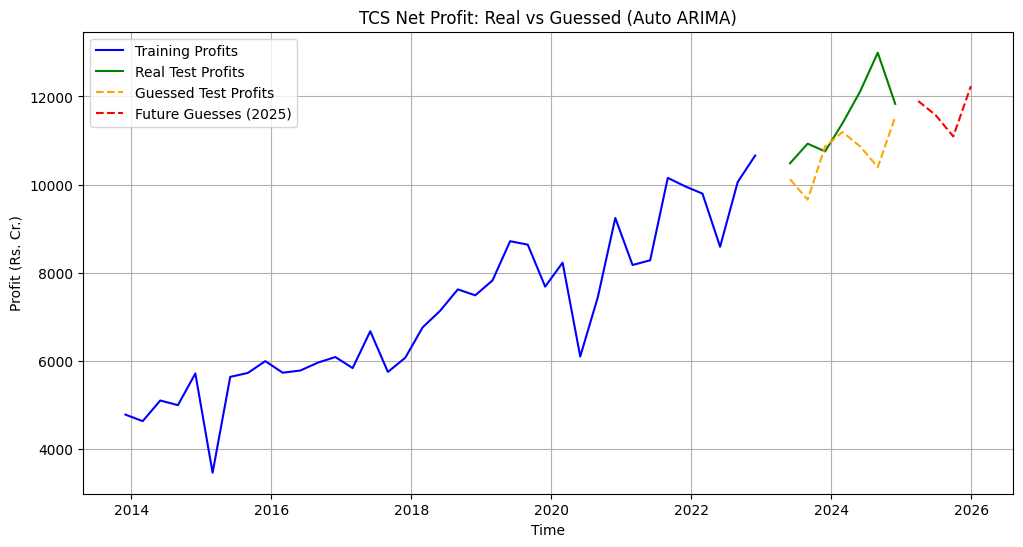


Guessed Profits for 2025:
Mar 25: 11896.75 Rs. Cr.
Jun 25: 11578.09 Rs. Cr.
Sep 25: 11092.57 Rs. Cr.
Dec 25: 12235.95 Rs. Cr.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Same data setup
data = {'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]} 

df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

train_data = df.loc[:'2022-12-31']
test_data = df.loc['2023-03-31':]

# Auto-pick SARIMA
model = auto_arima(train_data['Net Profit'], 
                   seasonal=True, m=4,  # Quarterly
                   start_p=0, start_q=0, max_p=2, max_q=2,
                   start_P=0, start_Q=0, max_P=2, max_Q=2,
                   d=1, D=1, 
                   trace=True, error_action='ignore', suppress_warnings=True)
print(model.summary())

# Fit and predict
results = model.fit(train_data['Net Profit'])
test_predicted = results.predict(n_periods=len(test_data))

# Scores
mae = mean_absolute_error(test_data['Net Profit'], test_predicted)
rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], test_predicted))
print(f"MAE (Average Oops): {mae:.2f} Rs. Cr.")
print(f"RMSE (Big Oops): {rmse:.2f} Rs. Cr.")

# Future guesses
future_predicted = results.predict(n_periods=len(test_data) + 4)[-4:]
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Net Profit'], label='Training Profits', color='blue')
plt.plot(test_data.index, test_data['Net Profit'], label='Real Test Profits', color='green')
plt.plot(test_data.index, test_predicted, label='Guessed Test Profits', color='orange', linestyle='--')
plt.plot(future_dates, future_predicted, label='Future Guesses (2025)', color='red', linestyle='--')
plt.title('TCS Net Profit: Real vs Guessed (Auto ARIMA)')
plt.xlabel('Time')
plt.ylabel('Profit (Rs. Cr.)')
plt.legend()
plt.grid(True)
plt.show()

# 2025 guesses
print("\nGuessed Profits for 2025:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f} Rs. Cr.")